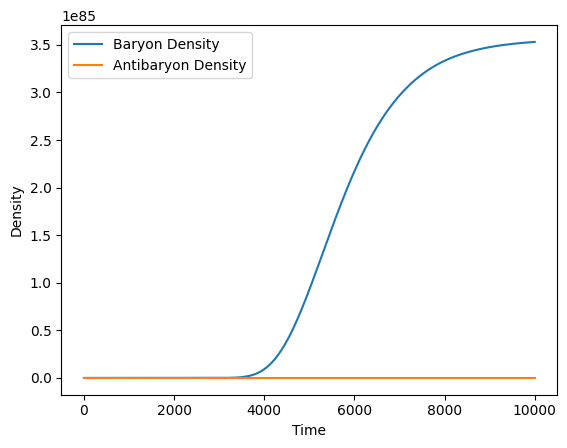

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the initial conditions of the universe
initial_baryon_density = 1.0  # Baryon density (scaled for stability)
initial_antibaryon_density = 0.9  # Antibaryon density (slightly different for asymmetry)

# Define baryon number violating process
def baryon_number_violation_rate(t):
    # Example rate decreasing with time, adjusted for better visibility
    return np.exp(-t / 1e3) * 1e2

# Define the CP violation parameter
cp_violation_parameter = 1e-3  # Increased for better visibility

# Define the differential equations
def equations(t, y):
    nB, nAntiB = y
    rate = baryon_number_violation_rate(t)
    dnB_dt = rate * cp_violation_parameter * (nB - nAntiB)
    dnAntiB_dt = -rate * cp_violation_parameter * (nB - nAntiB)
    return [dnB_dt, dnAntiB_dt]

# Ensure densities do not go negative by overriding negative values with zero in the solution
def non_negative_solutions(t, y):
    return [max(0, value) for value in y]

# Initial conditions for baryon and antibaryon number densities
initial_conditions = [initial_baryon_density, initial_antibaryon_density]

# Time range of the simulation
t_span = (0, 1e4)
t_eval = np.linspace(0, 1e4, 1000)

# Solve the differential equations
solution = solve_ivp(equations, t_span, initial_conditions, t_eval=t_eval, vectorized=True, method='RK45')

# Ensure densities do not go negative by overriding negative values with zero in the solution
solution.y = np.maximum(solution.y, 0) # Use np.maximum to apply the non-negative constraint element-wise

# Extract the solutions for baryon and antibaryon number densities
nB_solution = solution.y[0]
nAntiB_solution = solution.y[1]

# Plot the results
plt.plot(t_eval, nB_solution, label='Baryon Density')
plt.plot(t_eval, nAntiB_solution, label='Antibaryon Density')
plt.xlabel('Time')
plt.ylabel('Density')
plt.legend()
plt.show()
